# Кинематика К1

Движение точки задано на плоскости xy уравнениями x = f(t) и y = f(t) , где x и y выражены в сантиметрах, а t – в секундах. Найти и изобразить траекторию точки (кривую, которую точка описывает
при своем движении, считая, что движение начинается в момент времени
t = 0 c); определить скорость и ускорение точки, а также ее касательное и нормальное ускорения в момент времени t = 1 с и радиус кривизны в соответствующей точке траектории. Показать на чертеже положение
точки в момент времени t и найденные векторы скорости и ускорения
точки.

In [9]:
from numpy import cos, sin, pi, arange
import matplotlib.pyplot as plt
from scipy.optimize import root

def derivative(f,a,method='central',h=0.01):
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        print("Method must be 'central', 'forward' or 'backward'.")

Исходные данные

In [10]:
ordinate = [
    lambda t : 1 + 4 * cos(pi*t/6),
    lambda t : 2 * cos(pi*t/3),
    lambda t : 3 - cos(pi*t/6),
    lambda t : cos(pi*t/3) - 2,
    lambda t : 7 * cos(pi*t/6) - 5,
    lambda t : 2 - 3 * cos(pi*t/6),
    lambda t : cos(pi*t/3),
    lambda t : - cos(pi*t/6) + 8,
    lambda t : - cos(pi*t/3),
    lambda t : 3 + 7 * cos(pi*t/6),
]

absciss = [
    lambda t : 4 + 2 * sin(pi*t/6),
    lambda t : 4 * sin(pi*t/6) - 2,
    lambda t : sin(pi*t/6) + 5,
    lambda t : 3 - 2 * sin(pi*t/6),
    lambda t : - sin(pi*t/6) - 1,
    lambda t : 2 + 5 * sin(pi*t/6),
    lambda t : 2 * sin(pi*t/6),
    lambda t : - 4 * sin(pi*t/6),
    lambda t : sin(pi*t/6) + 9,
    lambda t : 7 + 3 * sin(pi*t/6),
]

ts = 1

Вариант

In [11]:
var = (6,5)

Координаты точки в момент времени t = 1 c.

In [12]:
x, y = round(absciss[var[1]](ts),2), round(ordinate[var[0]](ts),2)
x, y

(4.5, 0.5)

Вывод графика траектории движения точки.

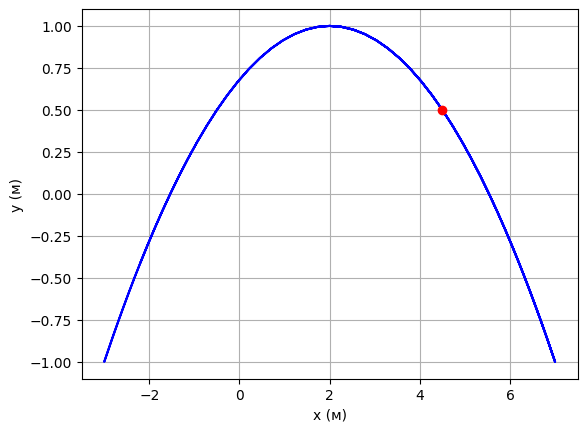

In [13]:
x_tr = arange(0, 20, 0.1)
plt.plot(absciss[var[1]](x_tr), ordinate[var[0]](x_tr), 'blue')
plt.plot(x, y, 'o', color='red')
plt.xlabel('x (м)')
plt.ylabel('y (м)')
plt.subplot(1, 1, 1)
plt.grid(True)
plt.show()

Расчёт скорости в точке.

In [14]:
vx, vy = round(derivative(absciss[var[1]], ts), 2), round(derivative(ordinate[var[0]], ts), 2)
v = round((vx**2 + vy**2)**0.5, 2)
vx, vy, v

(2.27, -0.91, 2.45)

Расчёт ускорения.

In [15]:
ax = round(derivative(lambda t: derivative(absciss[var[1]], t), ts), 2)
ay = round(derivative(lambda t: derivative(ordinate[var[0]], t), ts), 2)
a = round((ax**2 + ay**2)**0.5)
ax, ay, a

(-0.69, -0.55, 1)

Расчёт касательного и нормального ускорений, радиуса кривизны.

In [16]:
a_t  = round((vx * ax + vy * ay) / v, 2)
a_n  = round((vx * ay - vy * ax) / v, 2)
ro = round(v**2 / a_n, 2)

a_t, a_n, ro

(-0.44, -0.77, -7.8)